In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('student_scores.csv')

In [4]:
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
dataset.shape

(25, 2)

In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


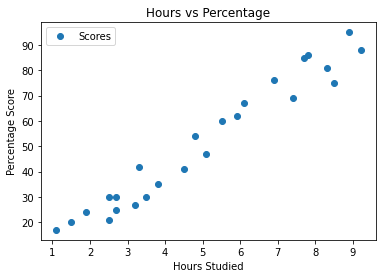

In [7]:
# scatter plot with the data
dataset.plot(x='Hours',y='Scores',style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [8]:
# segregating data into X and y (capital X and small y)
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

In [9]:
type(X)

numpy.ndarray

In [10]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [12]:
#importing 'train_test_split' function from sklearn package 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)   
 # splitting data into 80-20 for training and testing the model respecitvely
 # having random_state - allows you to have common, fixed numbers for the prediction model

In [13]:
# inmporting 'LinearRegression' class from sklearn package
# regression model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)
#'fit' model onto the train data and generate the regression line

LinearRegression()

In [14]:
print(regressor.intercept_)
# y intercept(c)

2.018160041434683


In [15]:
print(regressor.coef_)
#coefficient (m)

[9.91065648]


In [16]:
# predicting the value of y while inputing the value of X_test 
y_pred = regressor.predict(X_test)

In [17]:
# tabular comparison
df = pd.DataFrame({'Actual': y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [18]:
# calculating performance testing metric from sklearn

from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  4.183859899002975
Mean Squared Error:  21.5987693072174
Root Mean Squared Error:  4.6474476121003665


In [19]:
# package used for saving the model
import pickle

In [20]:
# data dictionary
data = {"model":regressor,"hours":X_train}

# open file with binary; 'wb' = write binary
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [21]:
# 'rb' - read the pickle file
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"] 
hours = data["hours"]

# loads data of model and hours into variables

In [22]:
#predicts using the saved model

y_pred = regressor_loaded.predict(X_train[[0]])                # First record to predict y data
print(f"Number of Hours: {X_train[0]} , Marks: {y_pred}")

Number of Hours: [3.8] , Marks: [39.67865467]


In [23]:
# spyder - predict_page.py

# Multiple Linear Regression

In [25]:
dataset2 = pd.read_csv('petrol_consumption.csv')

In [28]:
dataset2.head()
# Petrol_Consumption - dependant variable (rest are independant)

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [29]:
dataset2.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [32]:
dataset2.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [50]:
X = dataset2[['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)']]
y = dataset2['Petrol_Consumption']

In [51]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [52]:
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=0)

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [57]:
coeff_df = pd.DataFrame(regressor.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Petrol_tax,-40.016660
Average_income,-0.065413
Paved_Highways,-0.004741
Population_Driver_licence(%),1341.862121


In [65]:
y_pred = regressor.predict(X_test)

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [67]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error:  56.822247478964684
Mean Squared Error:  4666.344787588359
Root Mean Squared Error:  68.31064915215167


<AxesSubplot:xlabel='Petrol_Consumption'>

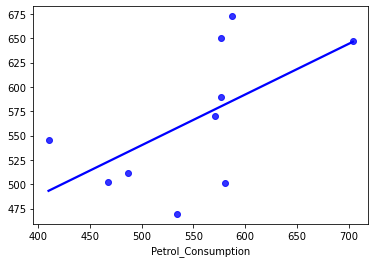

In [70]:
import seaborn as sns
sns.regplot(x=y_test,y=y_pred,ci=None,color="b")
#ci (confidence interval) - outliers are not considered 

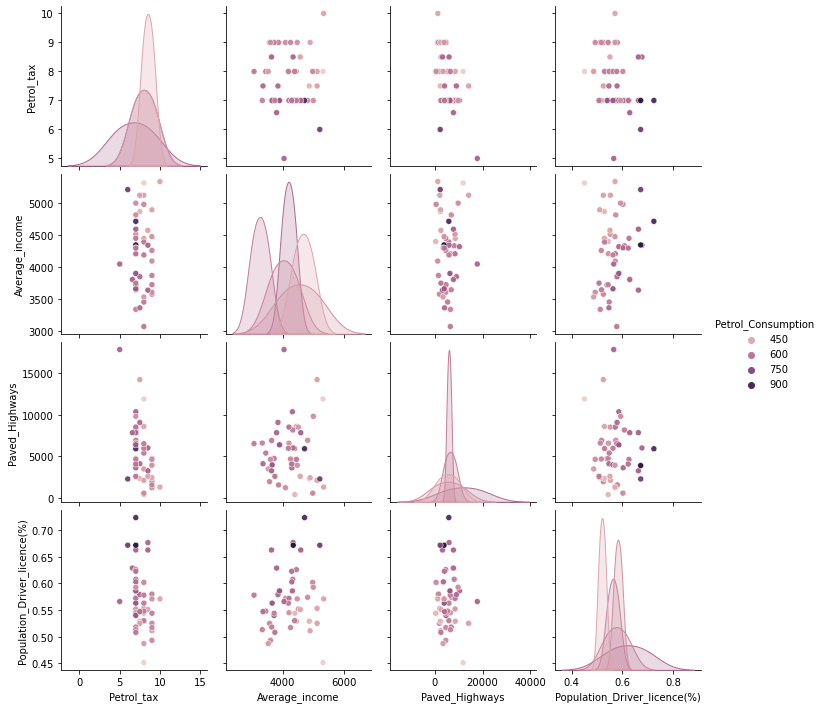

In [74]:
sns.pairplot(dataset2, hue = "Petrol_Consumption")